In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
%cd /content/gdrive/My Drive/Fake News Detection Project

/content/gdrive/My Drive/Fake News Detection Project


In [5]:
data = pd.read_csv('news.csv')

In [6]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


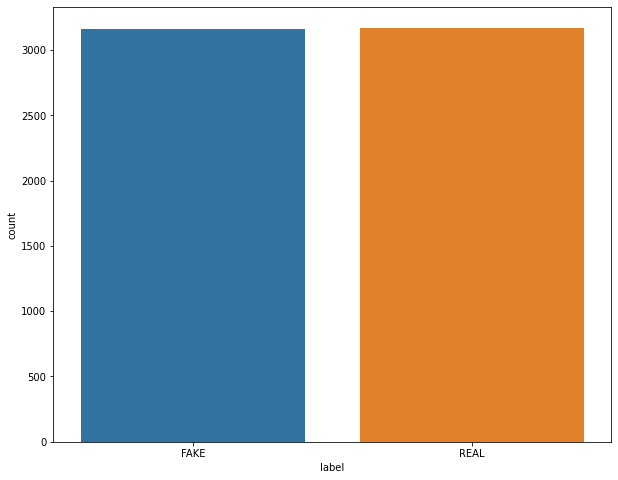

In [7]:
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 10,8
sns.countplot(x = data["label"])

In [8]:
data=data.drop(['Unnamed: 0'],axis=1)
for label in data:
  data[label].replace("REAL", 0, inplace=True)
  data[label].replace("FAKE", 1, inplace=True)

In [9]:
messages=data.copy()
messages.reset_index(inplace=True)
messages.head(5)

,index,title,text,label
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    txt = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    txt = txt.lower()
    txt = txt.split()
    
    txt = [ps.stem(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt)
    corpus.append(txt)

In [12]:
corpus

['daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack 

In [13]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [14]:
X.shape

(6335, 5000)

In [33]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06471262, 0.07699755, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02438212, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfidf_v.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc']

In [16]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

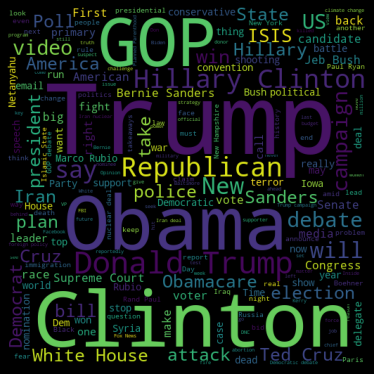

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
real=' '.join(list(messages[messages['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

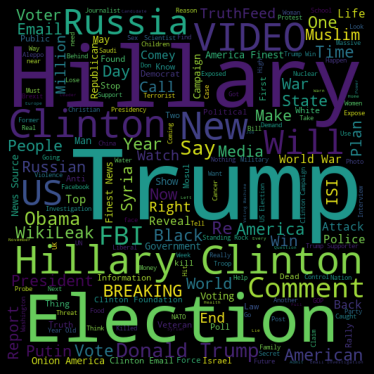

In [18]:
fake=' '.join(list(messages[messages['label']==1]['title']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
y=messages['label']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [21]:
count = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count.head()

,abandon,abc,abc news,abdullah,abedin,abil,abl,abort,abroad,absenc,absolut,absurd,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord new,accord report,account,accumul,accur,accus,achiev,acknowledg,acquir,across,across countri,act,act like,action,activ,activist,...,would support,would take,wound,wrap,write,writer,written,wrong,wrongdo,wrote,www,www infowarsstor,www infowarsstor com,yard,ye,yeah,year,year ago,year later,year old,year sinc,yell,yemen,yesterday,yet,yet anoth,yield,york,york citi,york time,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
0,0.000000,0.032158,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.119271,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.080835,0.0,0.0,0.00000,0.0,0.0,0.046353,0.0,0.026076,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011716,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.018593,0.0,0.0,0.019499,0.0,0.026197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038701,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.093178,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.050111,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029727,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.039832,0.023225,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.030786,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.023007,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013974,0.000000,0.0,0.028692,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.023258,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033078,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.047943,0.000000,0.0,0.098436,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.039896,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.038388,0.045675,0.0,0.0,0.000000,0.0,0.037054,0.0,0.0,0.0,0.000000,0.0,0.0,0.047459,0.0,0.027727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.10753,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.023025,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.036212,0.0,0.027323,0.0,0.0,0.000000,0.0,0.026558,0.0,0.0,0.0,0.0,0.0,0.0,0.041957,0.028382,0.0,0.028715,0.0,0.0,0.0,0.000000,0.022195,0.0,0.0,0.046554,0.0,0.062544,0.028343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [53]:
from sklearn.naive_bayes import MultinomialNB
naive_b=MultinomialNB()
from sklearn import metrics
import itertools

accuracy:   0.884


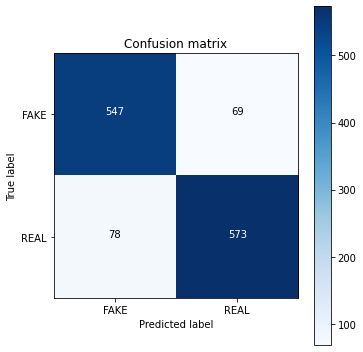

In [54]:
naive_b.fit(X_train, y_train)
pred = naive_b.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


accuracy:   0.938


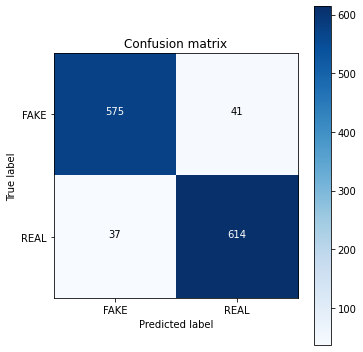

In [55]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
pred = pac.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.781


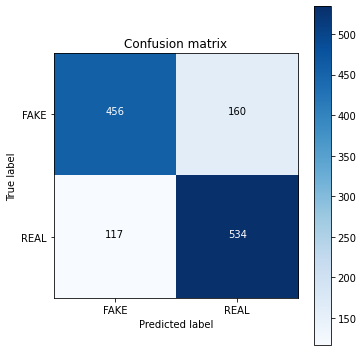

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dc = DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.934


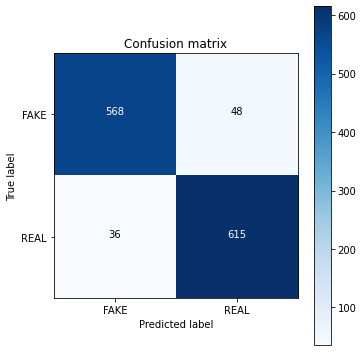

In [58]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1e5,max_iter=500)
lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = data['text'])
X = tokenizer.texts_to_sequences(texts = data['text'])

In [72]:
X = pad_sequences(sequences = X, maxlen = 5000, padding = 'pre')
print(X.shape)
y = data['label']
print(y.shape)

(6335, 5000)
(6335,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [74]:
lstm = Sequential(name = 'lstm_model')
lstm.add(layer = Embedding(input_dim = 5000, output_dim = 120, name = '1st_layer'))
lstm.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0, name = '2nd_layer'))
lstm.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [85]:
lstm_fit = lstm.fit(X_train, y_train, epochs = 5)

Epoch 1/5
159/159 [==============================] - 35s 223ms/step - loss: 0.0264 - accuracy: 0.9909
Epoch 2/5
159/159 [==============================] - 35s 222ms/step - loss: 0.0890 - accuracy: 0.9670
Epoch 3/5
159/159 [==============================] - 35s 222ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 4/5
159/159 [==============================] - 35s 222ms/step - loss: 0.0154 - accuracy: 0.9943
Epoch 5/5
159/159 [==============================] - 35s 221ms/step - loss: 0.0052 - accuracy: 0.9994


accuracy:   0.850


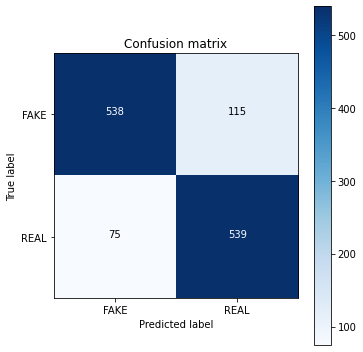

In [89]:
pred = lstm.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])